In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from textblob import TextBlob
import nltk
from wordcloud import WordCloud, STOPWORDS

In [18]:
# Reading the file after manual cleaning

df = pd.read_excel(r'CS102.xlsx')
df.head()

,Timestamp,Instructor,Class,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten,Eleven
0,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared but not thoroughly discussed,To some extent\n,Helpful\n,"Yes, but could be better\n",Good\n,All,None,None,Our timing was bad. Always at the end of the e...
1,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 100%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, definitely\n",Good\n,The project and the course content.,NaN,NaN,More assignments and lecture hours
2,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,At most 2 hours/week,At most 50%,They were shared and clearly discussed,To some extent\n,Helpful\n,"Yes, but could be better\n",Good\n,.,.,.,.
3,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, but could be better\n",Good\n,everything,nothing to add,nothing to add,nothing to add
4,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, but could be better\n",Good\n,Doing exercises,.,Having the corrections of the exercises,Nothing


In [3]:
# Visualising the intial data
color = sns.color_palette()
%matplotlib inline
py.init_notebook_mode(connected=True)

# Q2 Scores
fig = px.histogram(df, x="Two")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Q2 Results')
fig.show()

# Question Two: How much of the teaching offered did you attend?
# We can deduce that that the majority of the students have attended around 75% of the course offered

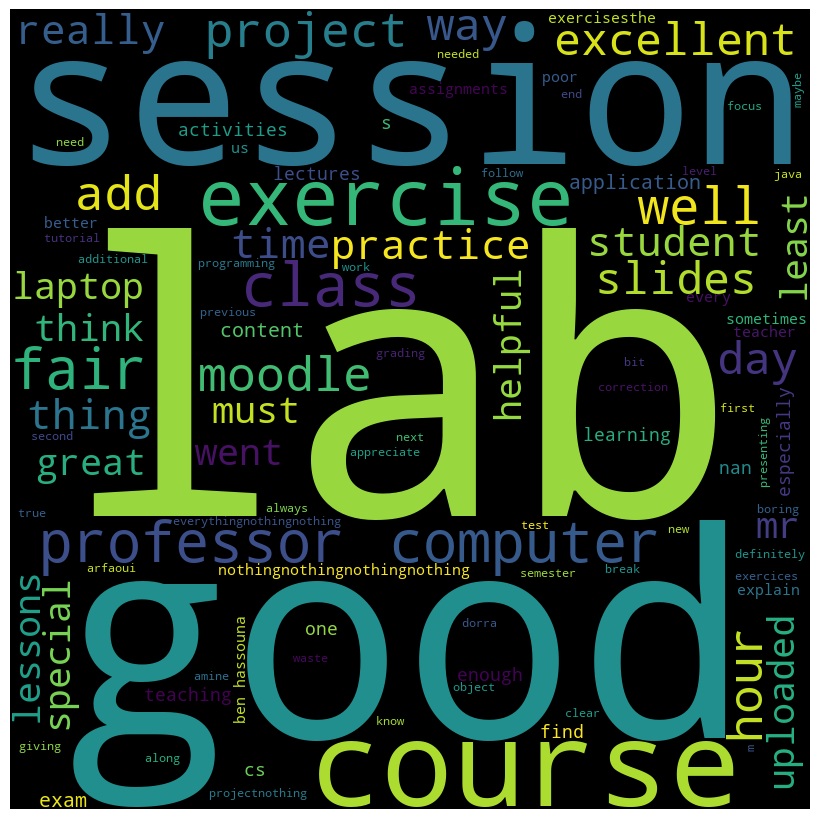

In [4]:
# Most Commonly used words in the evaluations

df['student_eval'] = df['Eight'] + df['Nine'] + df['Ten'] + df['Eleven']

comment_words = ''
stopwords = STOPWORDS.update(["nothing", "Nothing", "everything", "Everything"])
 
# iterate through the file
for val in df.student_eval:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [5]:
# Create empty lists to store the sentiment scores
polarity_scores = []
subjectivity_scores = []

# Create empty list for words used
words_used = []

In [6]:
# Perform sentiment analysis on each row in the DataFrame
for index, row in df.iterrows():
    # Concatenate the text from multiple columns if needed
    text = ' '.join(str(row[column]) for column in df.columns)
    # Create a TextBlob object and calculate sentiment scores
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    wording = blob.words
    
    
    # Append the scores to the respective lists
    polarity_scores.append(polarity)
    subjectivity_scores.append(subjectivity)
    words_used.append(wording)

In [7]:
# Add sentiment scores as new columns in the DataFrame
df['Polarity'] = polarity_scores
df['Subjectivity'] = subjectivity_scores
df['Words'] = words_used

In [8]:
# Save the updated DataFrame to a new Excel file
df.to_excel(r'C:\Users\eyasf\AI Sentiment Analysis\CS102_1_output.xlsx', index=False)

In [9]:
df

,Timestamp,Instructor,Class,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten,Eleven,student_eval,Polarity,Subjectivity,Words
0,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared but not thoroughly discussed,To some extent\n,Helpful\n,"Yes, but could be better\n",Good\n,All,None,None,Our timing was bad. Always at the end of the e...,AllNoneNoneOur timing was bad. Always at the e...,-0.050000,0.608333,"[Fall, 2018, Dorra, Louati, Amine, B.Hassouna,..."
1,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 100%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, definitely\n",Good\n,The project and the course content.,NaN,NaN,More assignments and lecture hours,NaN,0.325000,0.495833,"[Fall, 2018, Dorra, Louati, Amine, B.Hassouna,..."
2,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,At most 2 hours/week,At most 50%,They were shared and clearly discussed,To some extent\n,Helpful\n,"Yes, but could be better\n",Good\n,.,.,.,.,....,0.460000,0.496667,"[Fall, 2018, Dorra, Louati, Amine, B.Hassouna,..."
3,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, but could be better\n",Good\n,everything,nothing to add,nothing to add,nothing to add,everything nothing to add nothing to add nothi...,0.325000,0.495833,"[Fall, 2018, Dorra, Louati, Amine, B.Hassouna,..."
4,Fall 2018,"Dorra Louati, Amine B.Hassouna",Sophomore,Around 4 hours/week,About 75%,They were shared and clearly discussed,"Yes, definitely\n",Helpful\n,"Yes, but could be better\n",Good\n,Doing exercises,.,Having the corrections of the exercises,Nothing,Doing exercises .Having the corrections of the...,0.325000,0.495833,"[Fall, 2018, Dorra, Louati, Amine, B.Hassouna,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Fall 2019,"Dorra Louati, Amine B.Hassouna",Sophomore,At most 2 hours/week,About 100%,They were shared but not thoroughly discussed,To some extent\n,Barely helpful\n,Barely helpful\n,"No, barely\n",Fair\n,nothing,way of giving information,way of giving information,Fair\nnothing way of giving informationway of ...,0.190000,0.500000,"[Fall, 2019, Dorra, Louati, Amine, B.Hassouna,..."
94,Fall 2019,"Dorra Louati, Amine B.Hassouna",Sophomore,At most 2 hours/week,About 75%,They were shared but not thoroughly discussed,"Yes, definitely\n",Helpful\n,Helpful\n,"Yes, but could be better\n",Good\n,the lab professors weal and marwen were good,nothing,having more than one lab exam would be a good ...,Good\nthe lab professors weal and marwen were ...,0.563636,0.554545,"[Fall, 2019, Dorra, Louati, Amine, B.Hassouna,..."
95,Fall 2019,"Dorra Louati, Amine B.Hassouna",Sophomore,At least 5 hours/week,About 75%,They were shared but not thoroughly discussed,"Yes, definitely\n",Helpful\n,Helpful\n,"Yes, but could be better\n",Good\n,Everything,The slides on moodle are not clear,We needed more exercise,Good\nEverything The slides on moodle are not ...,0.318750,0.497917,"[Fall, 2019, Dorra, Louati, Amine, B.Hassouna,..."
96,Fall 2019,"Dorra Louati, Amine B.Hassouna",Sophomore,At least 5 hours/week,About 75%,They were shared but not thoroughly discussed,"Yes, definitely\n",Helpful\n,Barely helpful\n,"Yes, but could be better\n",Good\n,the lab teacher was very helpful,nothing,nothing,Good\nthe lab teacher was very helpfulnothingn...,0.256250,0.412500,"[Fall, 2019, Dorra, Louati, Amine, B.Hassouna,..."


In [10]:
df[['Polarity']].describe()

,Polarity
count,98.000000
mean,0.316244
std,0.167461
min,-0.100000
25%,0.205432
50%,0.325000
75%,0.425000
max,0.700000


# What can we deduce?
#### The lowest value is -0.1, which indicates that the polarity of the most negative response is somewhat negative. (Range of sentiment polarity score is from -1 to +1)
#### The highest value is 0.7, which indicates that the polarity of the most positive response is somewhat positive.
#### The mean value is 0.3~ which means that while responses are positive, they are not highly positive either.

<Axes: title={'center': 'Sentiment Score'}, xlabel='Period', ylabel='Mean Sentiment Score'>

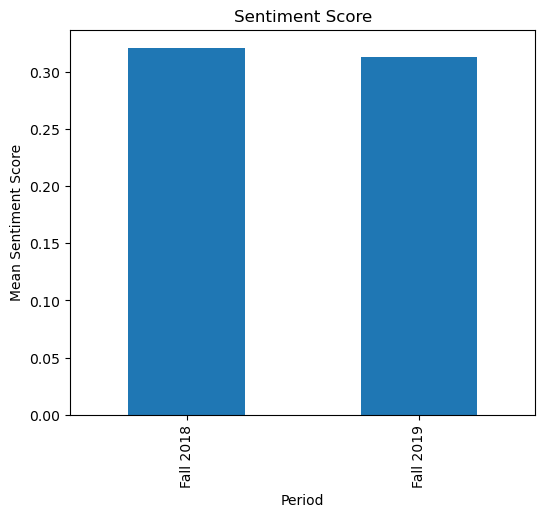

In [11]:
#generate mean of sentiment_score by period
dfg = df.groupby(['Timestamp'])['Polarity'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(6, 5))

# What can we deduce?

#### The responses for both Fall 2018 and Fall 2019 are close to being the same. No improvement between Fall 2018 and Fall 2019.

In [12]:
df[['Subjectivity']].describe()

,Subjectivity
count,98.000000
mean,0.517374
std,0.074754
min,0.248958
25%,0.494792
50%,0.510476
75%,0.551759
max,0.750000


# What can we deduce?

#### Subjectivity score shows the amount of personal opinion, If a sentence has high subjectivity (close to 1), it means that the text contains more personal opinion than factual information.

#### The mean value is ~0.5 which means that the responses are split in half between being subjective and objective. (Subjectivity score is from 0 to 1)